# KDD Cup 1999 - intrusion detection 

http://kdd.ics.uci.edu/databases/kddcup99/task.html
    
Here is a paper that analyzes the dataset
https://web.cs.dal.ca/~zincir/bildiri/pst05-gnm.pdf


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, linear_model, cluster, \
    preprocessing, metrics, pipeline, tree, ensemble, decomposition

pd.options.display.max_columns = 1000
%matplotlib inline

In [6]:
num_cluster = 30

In [7]:
columns = [f.split(":")[0] for f in """
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: continuous.
dst_host_same_srv_rate: continuous.
dst_host_diff_srv_rate: continuous.
dst_host_same_src_port_rate: continuous.
dst_host_srv_diff_host_rate: continuous.
dst_host_serror_rate: continuous.
dst_host_srv_serror_rate: continuous.
dst_host_rerror_rate: continuous.
dst_host_srv_rerror_rate: continuous.
""".split("\n") if len(f)>0]

columns.append("Category")
print(columns)

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Category']


In [8]:
df = pd.read_csv("/data/kddcup.data", header=None, names=columns)

In [9]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Category
0,0,tcp,http,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [10]:
df.Category.value_counts()

smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: Category, dtype: int64

Attacks fall into one of
four categories: User to Root; Remote to Local; Denial of
Service; and Probe.
 - Denial of Service (dos): Attacker tries to prevent
legitimate users from using a service.
 - Remote to Local (r2l): Attacker does not have an
account on the victim machine, hence tries to
gain access.
 - User to Root (u2r): Attacker has local access to
the victim machine and tries to gain super user
privileges.
 - Probe: Attacker tries to gain information about
the target host.

Mapping is below. 

In [11]:
attack_types = {
 'normal.': "normal", 
 'buffer_overflow.':'u2r', 
 'loadmodule.':'u2r', 
 'perl.':'u2r', 
 'neptune.':'dos',
 'smurf.':'dos',
 'guess_passwd.':'r2l', 
 'pod.': 'dos', 
 'teardrop.':'dos',
 'portsweep.':'probe',
 'ipsweep.':'probe',
 'land.':'dos',
 'ftp_write.':'r2l',
 'back.': 'dos',
 'imap.': 'r2l',
 'satan.': 'probe',
 'phf.':'r2l',
 'nmap.':'probe',
 'multihop.':'r2l',
 'warezmaster.':'r2l',
 'warezclient.':'r2l',
 'spy.':'r2l',
 'rootkit.':'u2r'}

In [12]:
df["label"] = np.where(df.Category == "normal.", "normal", "attack")
df["attack_type"] = df.Category.apply(lambda r: attack_types[r])

In [13]:
df.label.value_counts()/df.shape[0]

attack    0.80141
normal    0.19859
Name: label, dtype: float64

In [14]:
df.attack_type.value_counts(dropna=False)

dos       3883370
normal     972781
probe       41102
r2l          1126
u2r            52
Name: attack_type, dtype: int64

In [15]:
df_num = df.select_dtypes(include=[np.float64, np.int64])
df_num.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,0,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0
2,0,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0
3,0,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0
4,0,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0


In [16]:
X = preprocessing.StandardScaler().fit_transform(df_num)

CPU times: user 28.8 s, sys: 8.69 s, total: 37.5 s
Wall time: 28.4 s


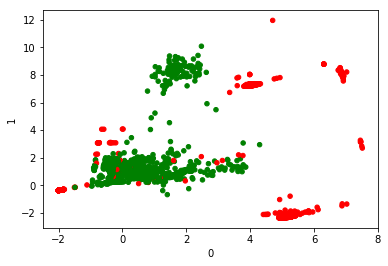

In [235]:
%%time
def display_2d(X, n_samples = 10000):
    pca = decomposition.PCA(n_components=2)
    pca_values = pca.fit_transform(X)
    X_pca = pca_values.copy()
    X_pca = pd.DataFrame(X_pca)
    X_pca["color"] = np.where(labels == "attack", "red", "green")
    X_sample = X_pca.sample(n_samples)
    colors = X_sample.color
    X_sample.plot.scatter(0, 1, color = colors)
    return pca_values

X_pca = display_2d(X)

In [237]:
%%time
y = preprocessing.LabelEncoder().fit_transform(df.label)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_pca, y, test_size = 0.3, random_state = 1)
est = tree.DecisionTreeClassifier(max_depth=5)
est.fit(X_train, y_train)
print("Accuracy:", est.score(X_test, y_test))

Accuracy: 0.9970405503800535
CPU times: user 9.49 s, sys: 251 ms, total: 9.74 s
Wall time: 9.74 s


In [242]:
est.feature_importances_

array([0.2368105, 0.7631895])

In [39]:
pca = decomposition.PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

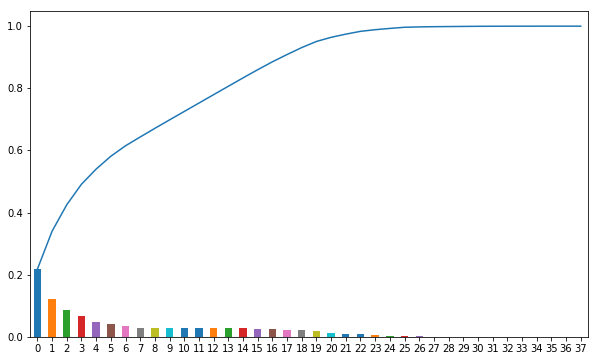

In [43]:
_, ax = plt.subplots(figsize = (10, 6))
pd.Series(pca.explained_variance_ratio_).plot.bar(ax = ax)
pd.Series(np.cumsum(pca.explained_variance_ratio_)).plot.line(ax = ax)

In [171]:
pd.DataFrame({"cumsum": np.cumsum(pca.explained_variance_ratio_)}).query("cumsum>=0.99").head()

,cumsum
24,0.992789


In [18]:
%%time
pca = decomposition.PCA(n_components=25)
X_pca = pca.fit_transform(X)

CPU times: user 1min 17s, sys: 56.8 s, total: 2min 13s
Wall time: 1min 54s


In [19]:
%%time
kmeans = cluster.MiniBatchKMeans(n_clusters=num_cluster)
y_cluster = kmeans.fit_predict(X_pca)

CPU times: user 15.6 s, sys: 892 ms, total: 16.5 s
Wall time: 9.23 s


In [20]:
pd.Series(y_cluster).value_counts()

9     2262816
3      324108
26     284870
19     279067
8      266668
2      265703
4      251196
1      207936
16     128479
28     127851
11     109844
22      96891
18      91815
5       60104
21      44746
24      31088
0       28265
6       18491
25       8778
17       4996
27       2485
23       1035
7         651
12        548
dtype: int64

In [224]:
for i in range(num_cluster):
    print("Cluster: ", i, "")
    print(pd.Series(df.Category[y_cluster == i]).value_counts())
    print("\n")

Cluster:  0 
smurf.     2806103
normal.        304
Name: Category, dtype: int64


Cluster:  1 
neptune.      866160
portsweep.       201
normal.           65
imap.              2
Name: Category, dtype: int64


Cluster:  2 
neptune.      204570
portsweep.      7246
normal.         1882
ipsweep.         191
satan.             3
Name: Category, dtype: int64


Cluster:  3 
normal.          2411
warezclient.       19
ftp_write.          2
multihop.           2
guess_passwd.       1
warezmaster.        1
Name: Category, dtype: int64


Cluster:  4 
normal.             335198
ipsweep.               822
warezclient.           616
back.                  426
nmap.                   48
pod.                    23
warezmaster.            18
buffer_overflow.        12
satan.                   9
imap.                    9
neptune.                 9
rootkit.                 3
loadmodule.              3
multihop.                2
portsweep.               2
ftp_write.               1
smurf.              

In [178]:
distances = np.zeros([df.shape[0]])
for i in range(num_cluster):
    centroid = kmeans.cluster_centers_[i]
    distances[y_cluster==i] = np.sqrt(np.sum((X_pca[y_cluster==i] - centroid)**2, axis = 1))
np.sort(distances)[::-1][:100]

array([689.23443365, 621.3949061 , 621.39031029, 440.30982984,
       421.46888954, 406.4107485 , 393.79130488, 365.76066498,
       345.07124035, 291.67571775, 278.80037374, 277.30149122,
       277.21147369, 277.2062876 , 257.45249046, 232.46404824,
       225.9500618 , 219.42014587, 214.72560286, 189.18878055,
       184.23841188, 177.53093176, 176.07001054, 171.907339  ,
       171.5358193 , 169.93502893, 168.03925748, 167.75202767,
       167.60447674, 161.94584276, 161.81064075, 160.36691135,
       155.14661059, 154.30681006, 153.93479222, 153.92025291,
       149.13032213, 148.65314661, 145.30075983, 142.48819667,
       138.94519965, 138.73436868, 138.69564646, 138.62820071,
       137.87648857, 134.95281781, 133.36937893, 133.14764103,
       132.80457913, 131.49850543, 130.45669101, 130.10272335,
       129.55642448, 129.27921177, 128.89958802, 128.87403315,
       128.86896531, 128.837752  , 127.09822912, 126.74857916,
       123.80487929, 123.7788794 , 123.74921296, 123.72

In [180]:
np.sum(distances ** 2), kmeans.inertia_

(12327843.447282968, 12327843.447282847)

In [ ]:
Average distance of a point to its closest centroid to within each cluster

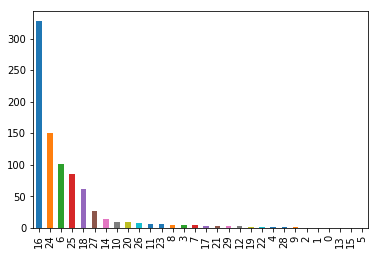

In [201]:
cluster_avg_distances = []
for i in range(num_cluster):
    cluster_avg_distances.append(np.mean(distances[y_cluster == i]))
pd.Series(cluster_avg_distances).sort_values(ascending=False).plot.bar()  

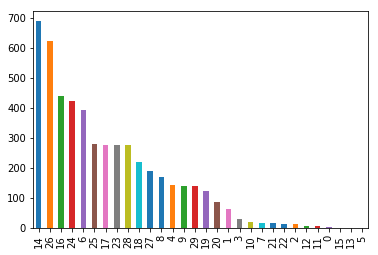

In [203]:
cluster_max_distances = []
for i in range(num_cluster):
    cluster_max_distances.append(np.max(distances[y_cluster == i]))
pd.Series(cluster_max_distances).sort_values(ascending=False).plot.bar()  

In [143]:
pd.Series(df.label[distances>113]).value_counts()

normal    82
attack    21
Name: label, dtype: int64

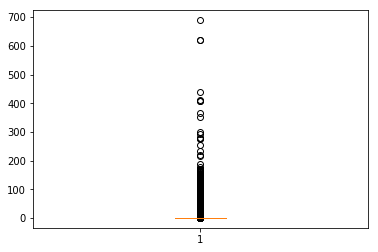

In [145]:
plt.boxplot(distances);

In [162]:
def outliers(distances):
    q1, q3 = np.percentile(distances, [0.25, 0.75])
    iqr = q3-q1
    upper_whisker = q3 + 1.5 * iqr
    lower_whisker = q1 - 1.5 * iqr
    return (distances > upper_whisker) | (distances < lower_whisker)

In [166]:
pd.Series(outliers(distances)).value_counts()

False    2610187
True     2288244
dtype: int64

In [122]:
np.sqrt(np.sum((X_pca[y_cluster==i] - centroid)**2, axis = 1)).shape

(2806407,)

In [175]:
X_pca[y_cluster==i].shape

(44016, 25)